In [1]:
import utils.training as train
import utils.constants as c
import utils.preprocessing as pp
import utils.evaluation as eval
import utils.visualization as vis
import utils.tools as tls
import utils.transfer_learning as tl
import utils.models as m

In [2]:
import importlib

importlib.reload(train)
importlib.reload(c)
importlib.reload(pp)
importlib.reload(eval)
importlib.reload(vis)
importlib.reload(tls)
importlib.reload(tl)
importlib.reload(m)

<module 'utils.models' from 'd:\\FERI\\transfer-learning\\src\\utils\\models.py'>

In [4]:
commodity = 'Rice'

large_datasets = ['Bangladesh', 'India', 'Indonesia', 'Nepal', 'Pakistan', 'Philipines', 'Senegal']
small_datasets = ['Argentina', 'Nigeria', 'Ukraine']

# Pretrained models on larger datasets


2/2 [==============================] - 0s 5ms/step


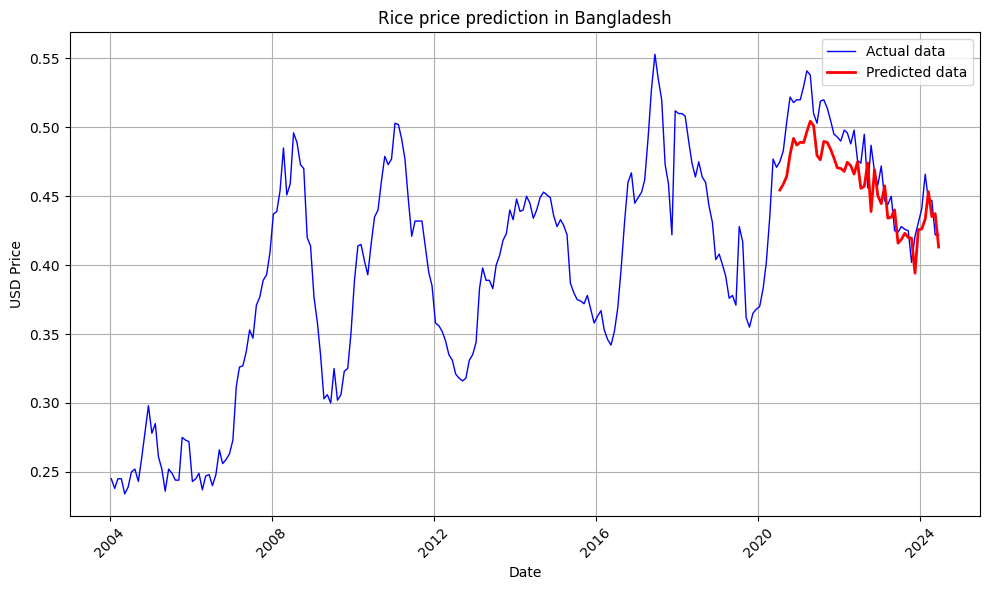

3/3 [==============================] - 0s 3ms/step


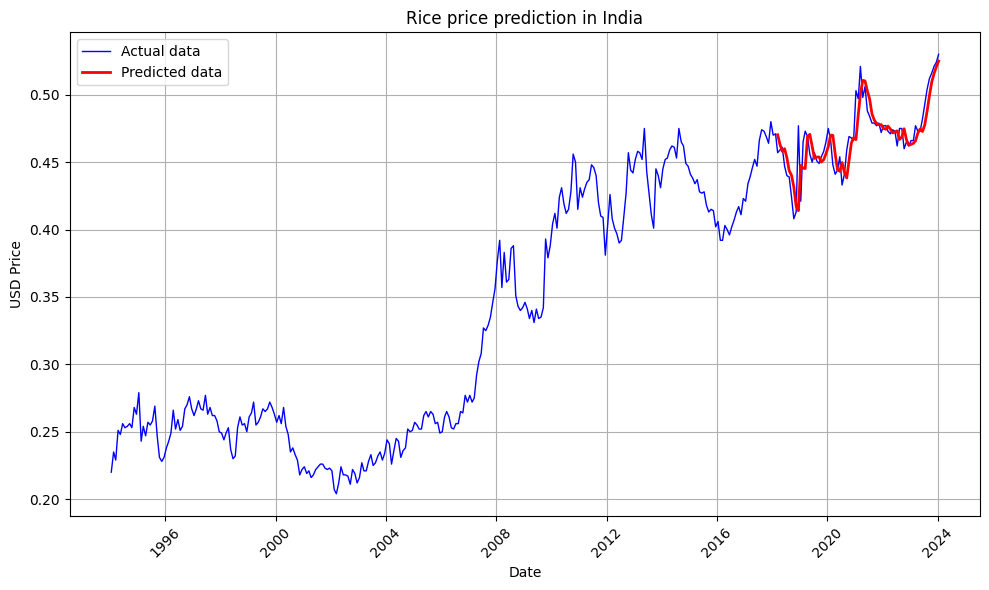

2/2 [==============================] - 0s 4ms/step


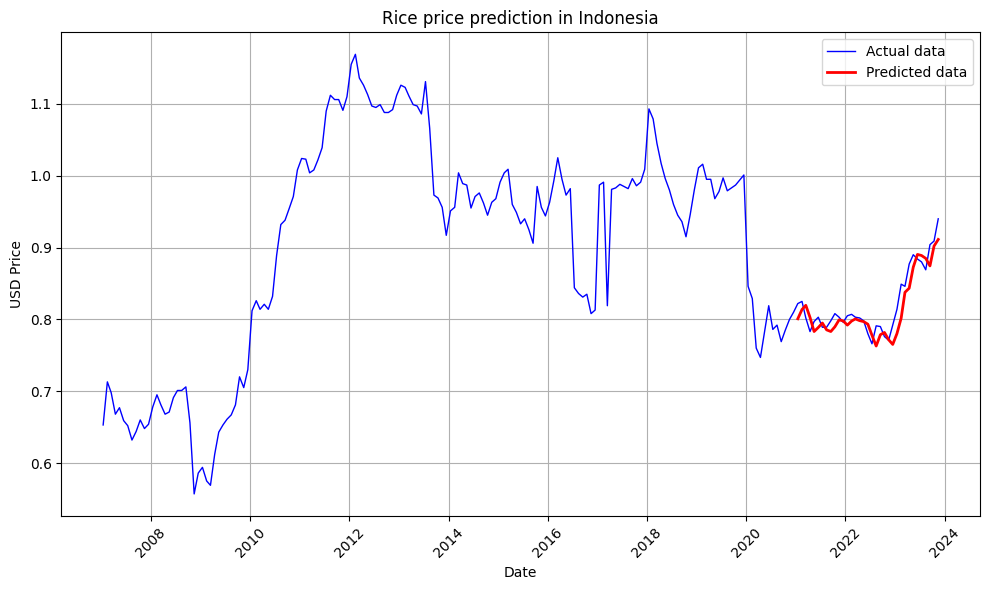

2/2 [==============================] - 0s 6ms/step


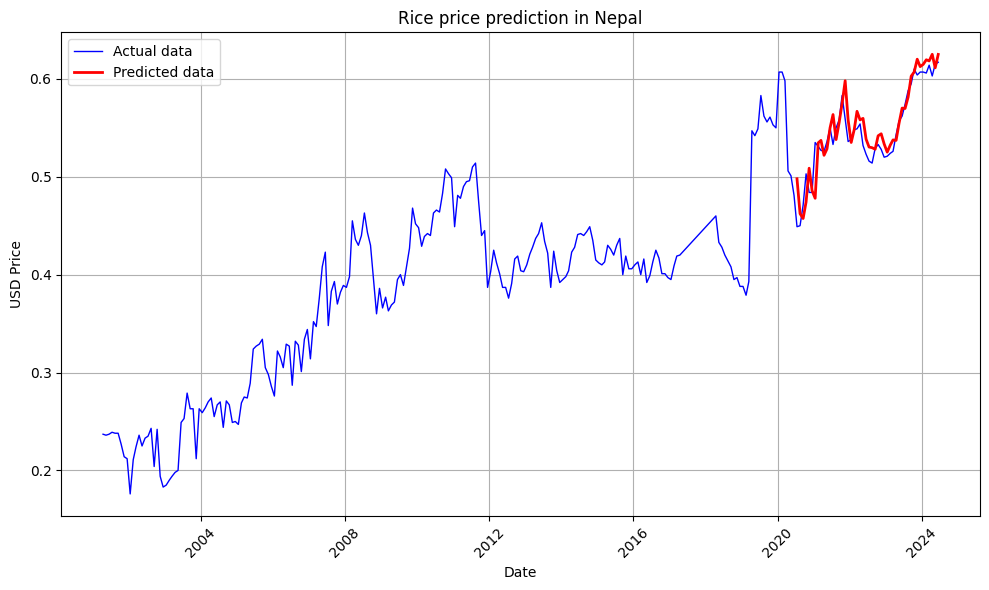

2/2 [==============================] - 0s 4ms/step


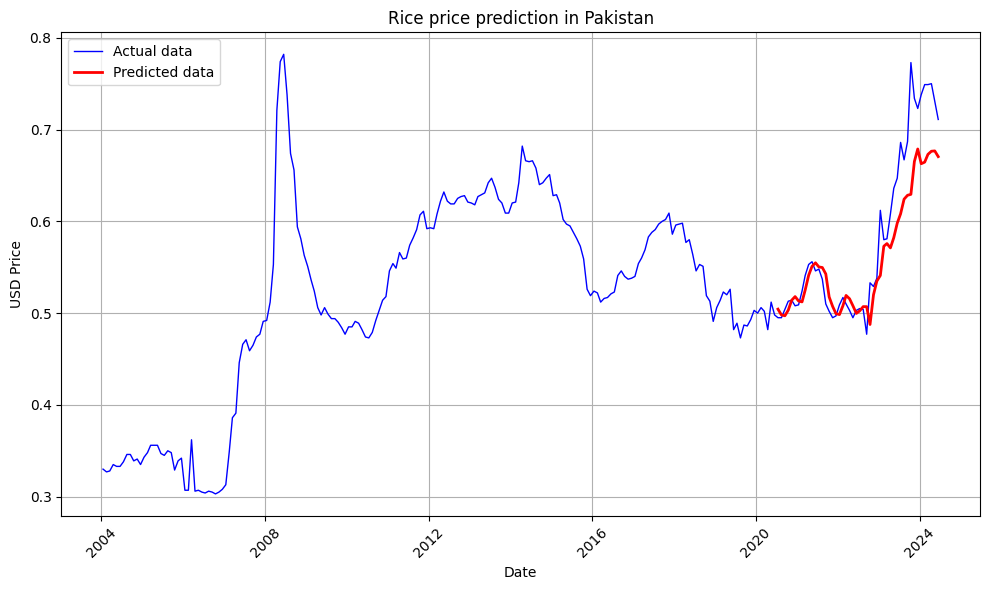

2/2 [==============================] - 0s 5ms/step


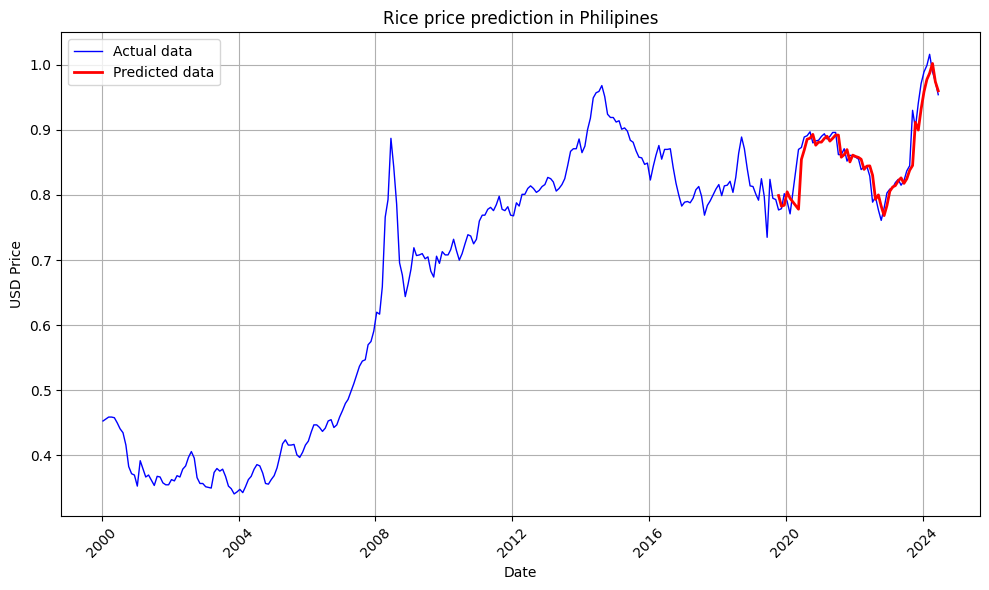

2/2 [==============================] - 0s 3ms/step


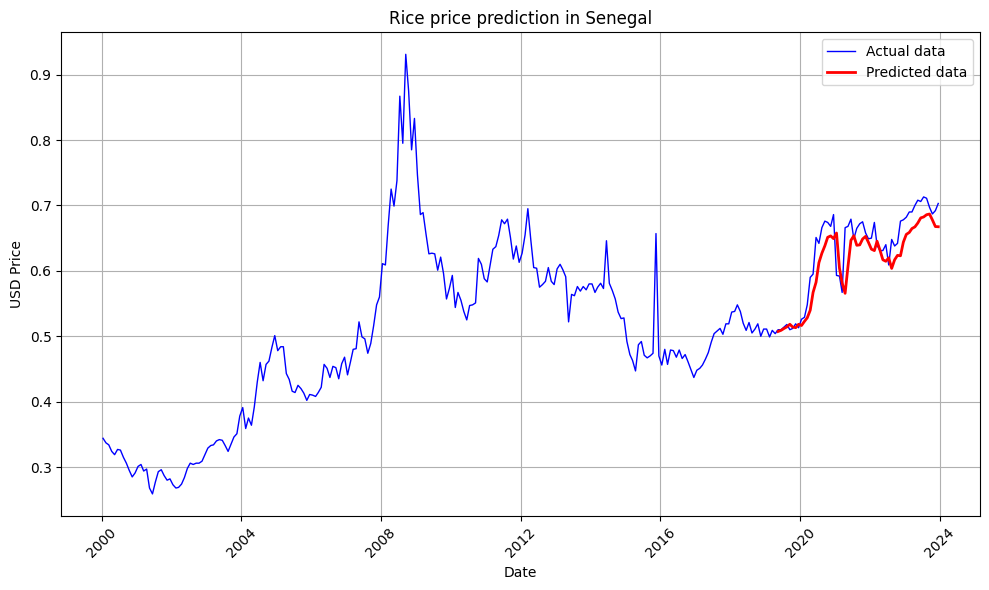

In [5]:
vis.plot_evaluations(large_datasets, commodity, c.get_large_model_results())

# Pretrained models on smaller datasets

1/1 [==============================] - 0s 263ms/step


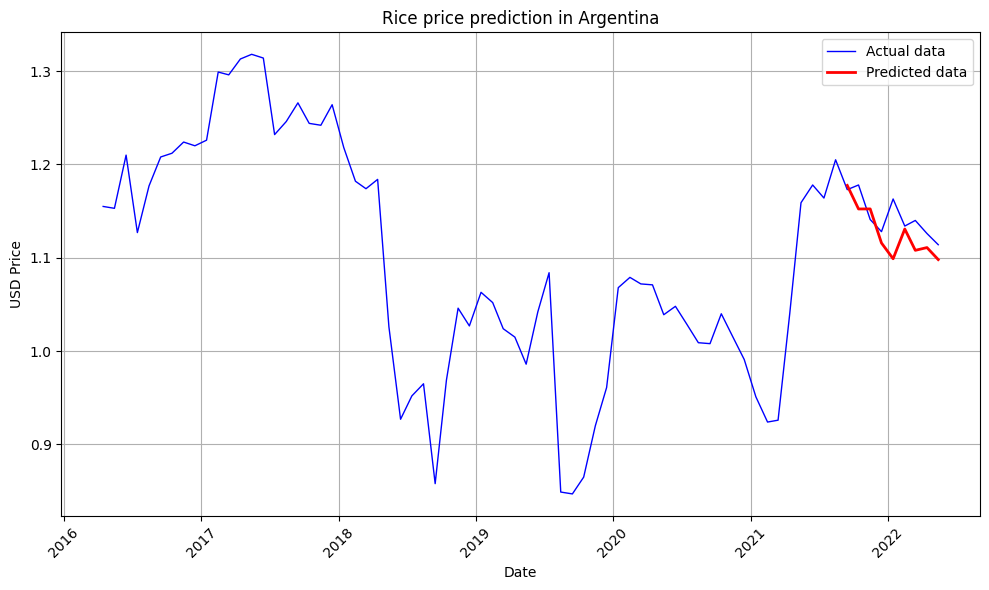

1/1 [==============================] - 0s 255ms/step


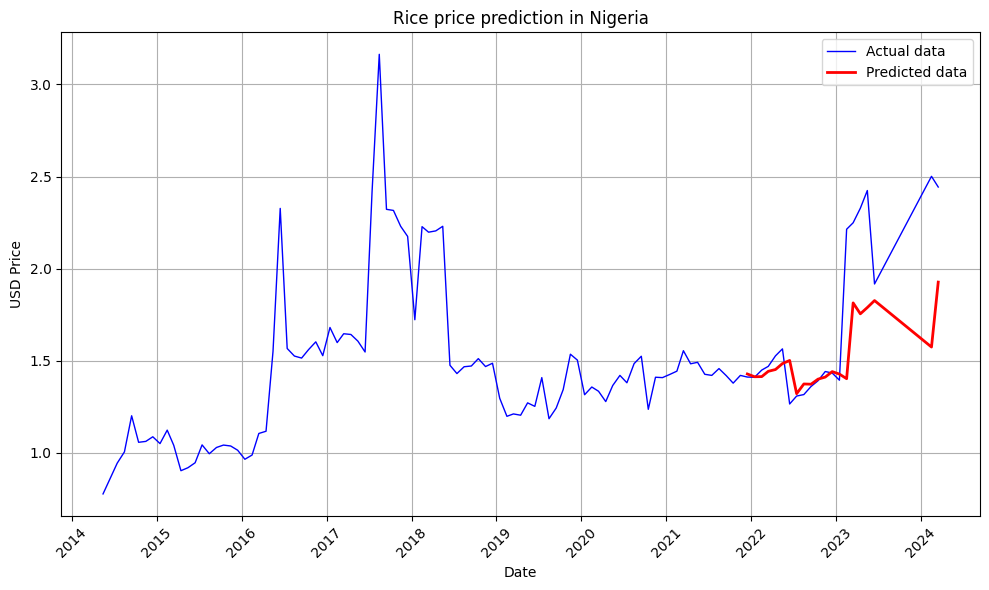

1/1 [==============================] - 0s 185ms/step


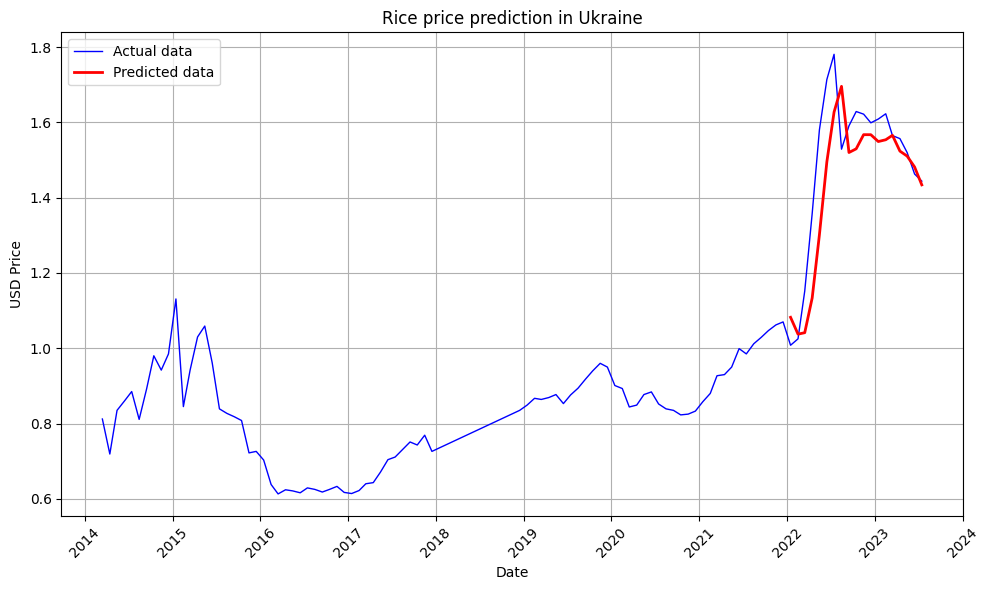

In [6]:
vis.plot_evaluations(small_datasets, commodity, c.get_small_model_results())

# Summary Argentina

1/1 [==============================] - 1s 983ms/step


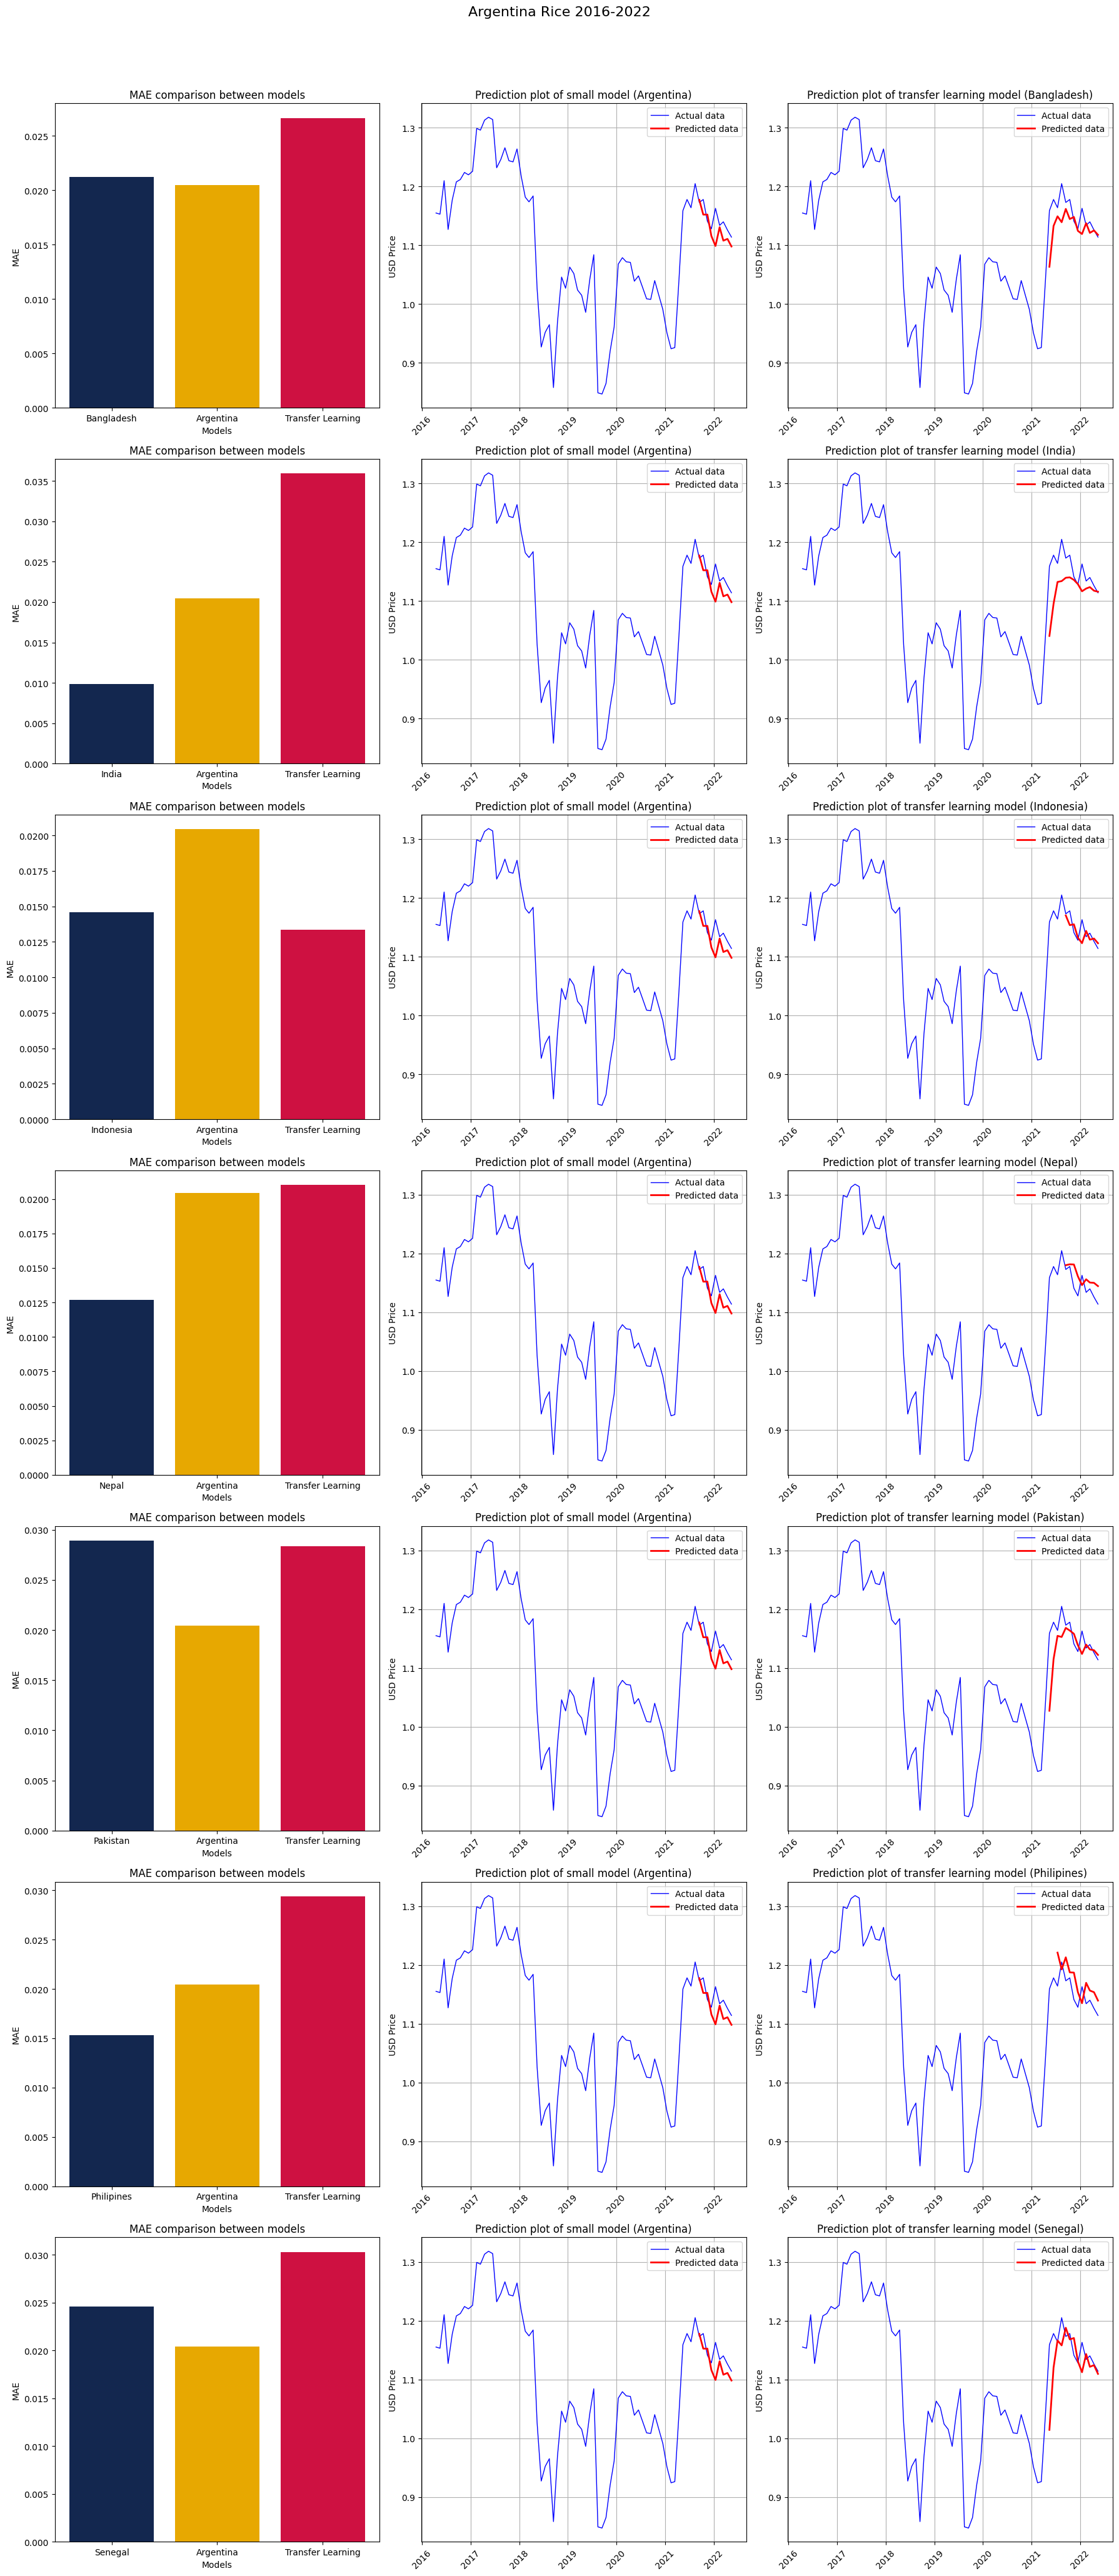

In [12]:
vis.visualize_tl_summary('Argentina', large_datasets, commodity, 'Argentina Rice 2016-2022')

# Summary Nigeria

1/1 [==============================] - 0s 438ms/step


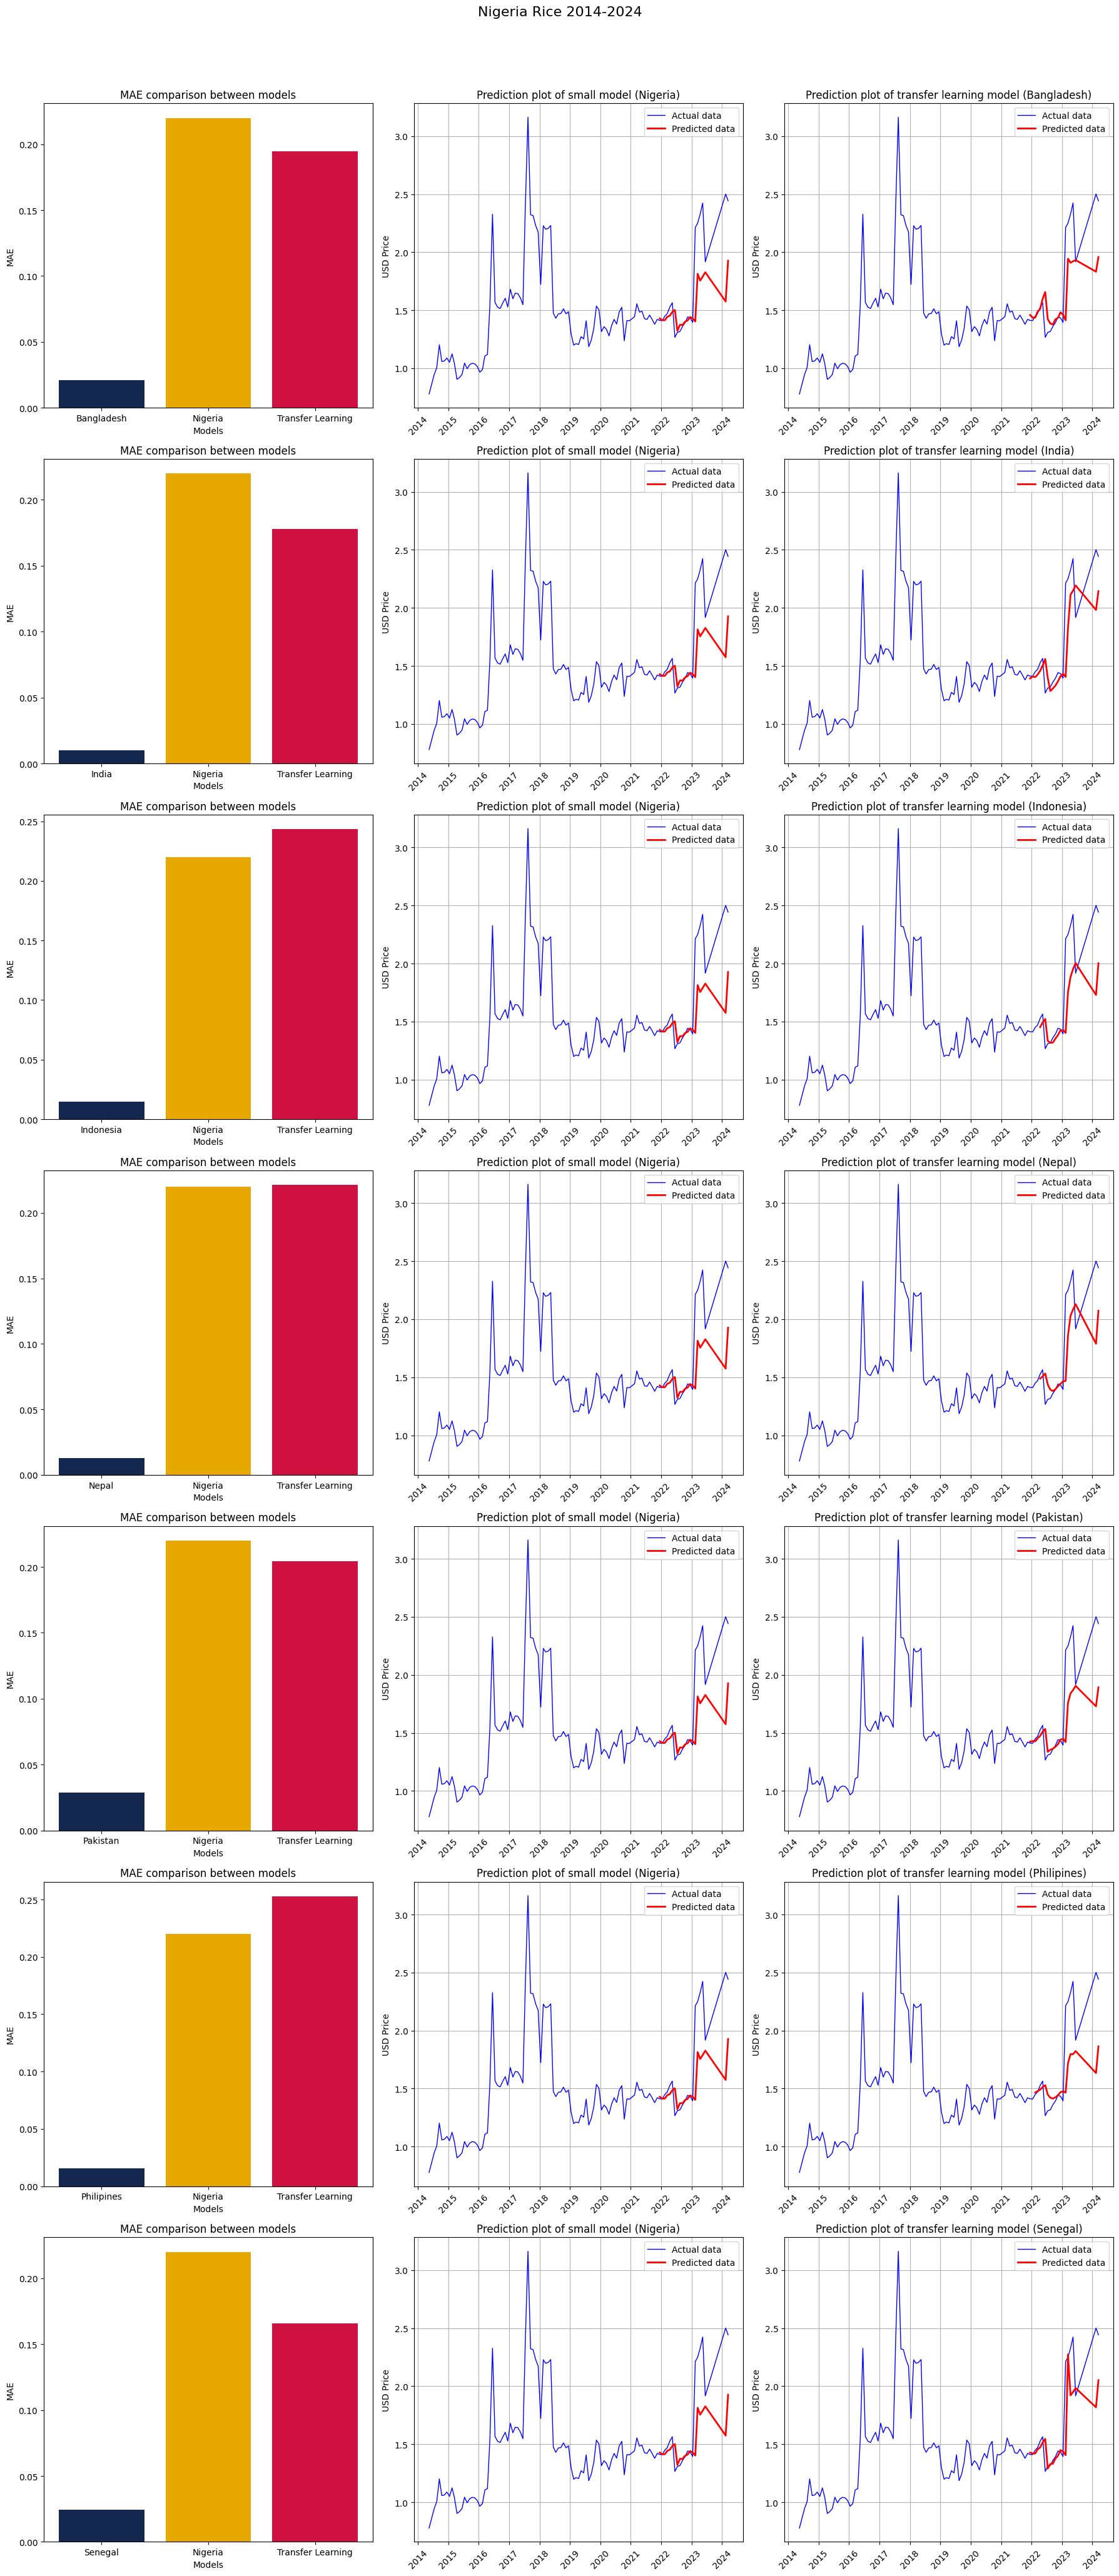

In [10]:
vis.visualize_tl_summary('Nigeria', large_datasets, commodity, 'Nigeria Rice 2014-2024')

# Summary Ukraine

1/1 [==============================] - 1s 838ms/step


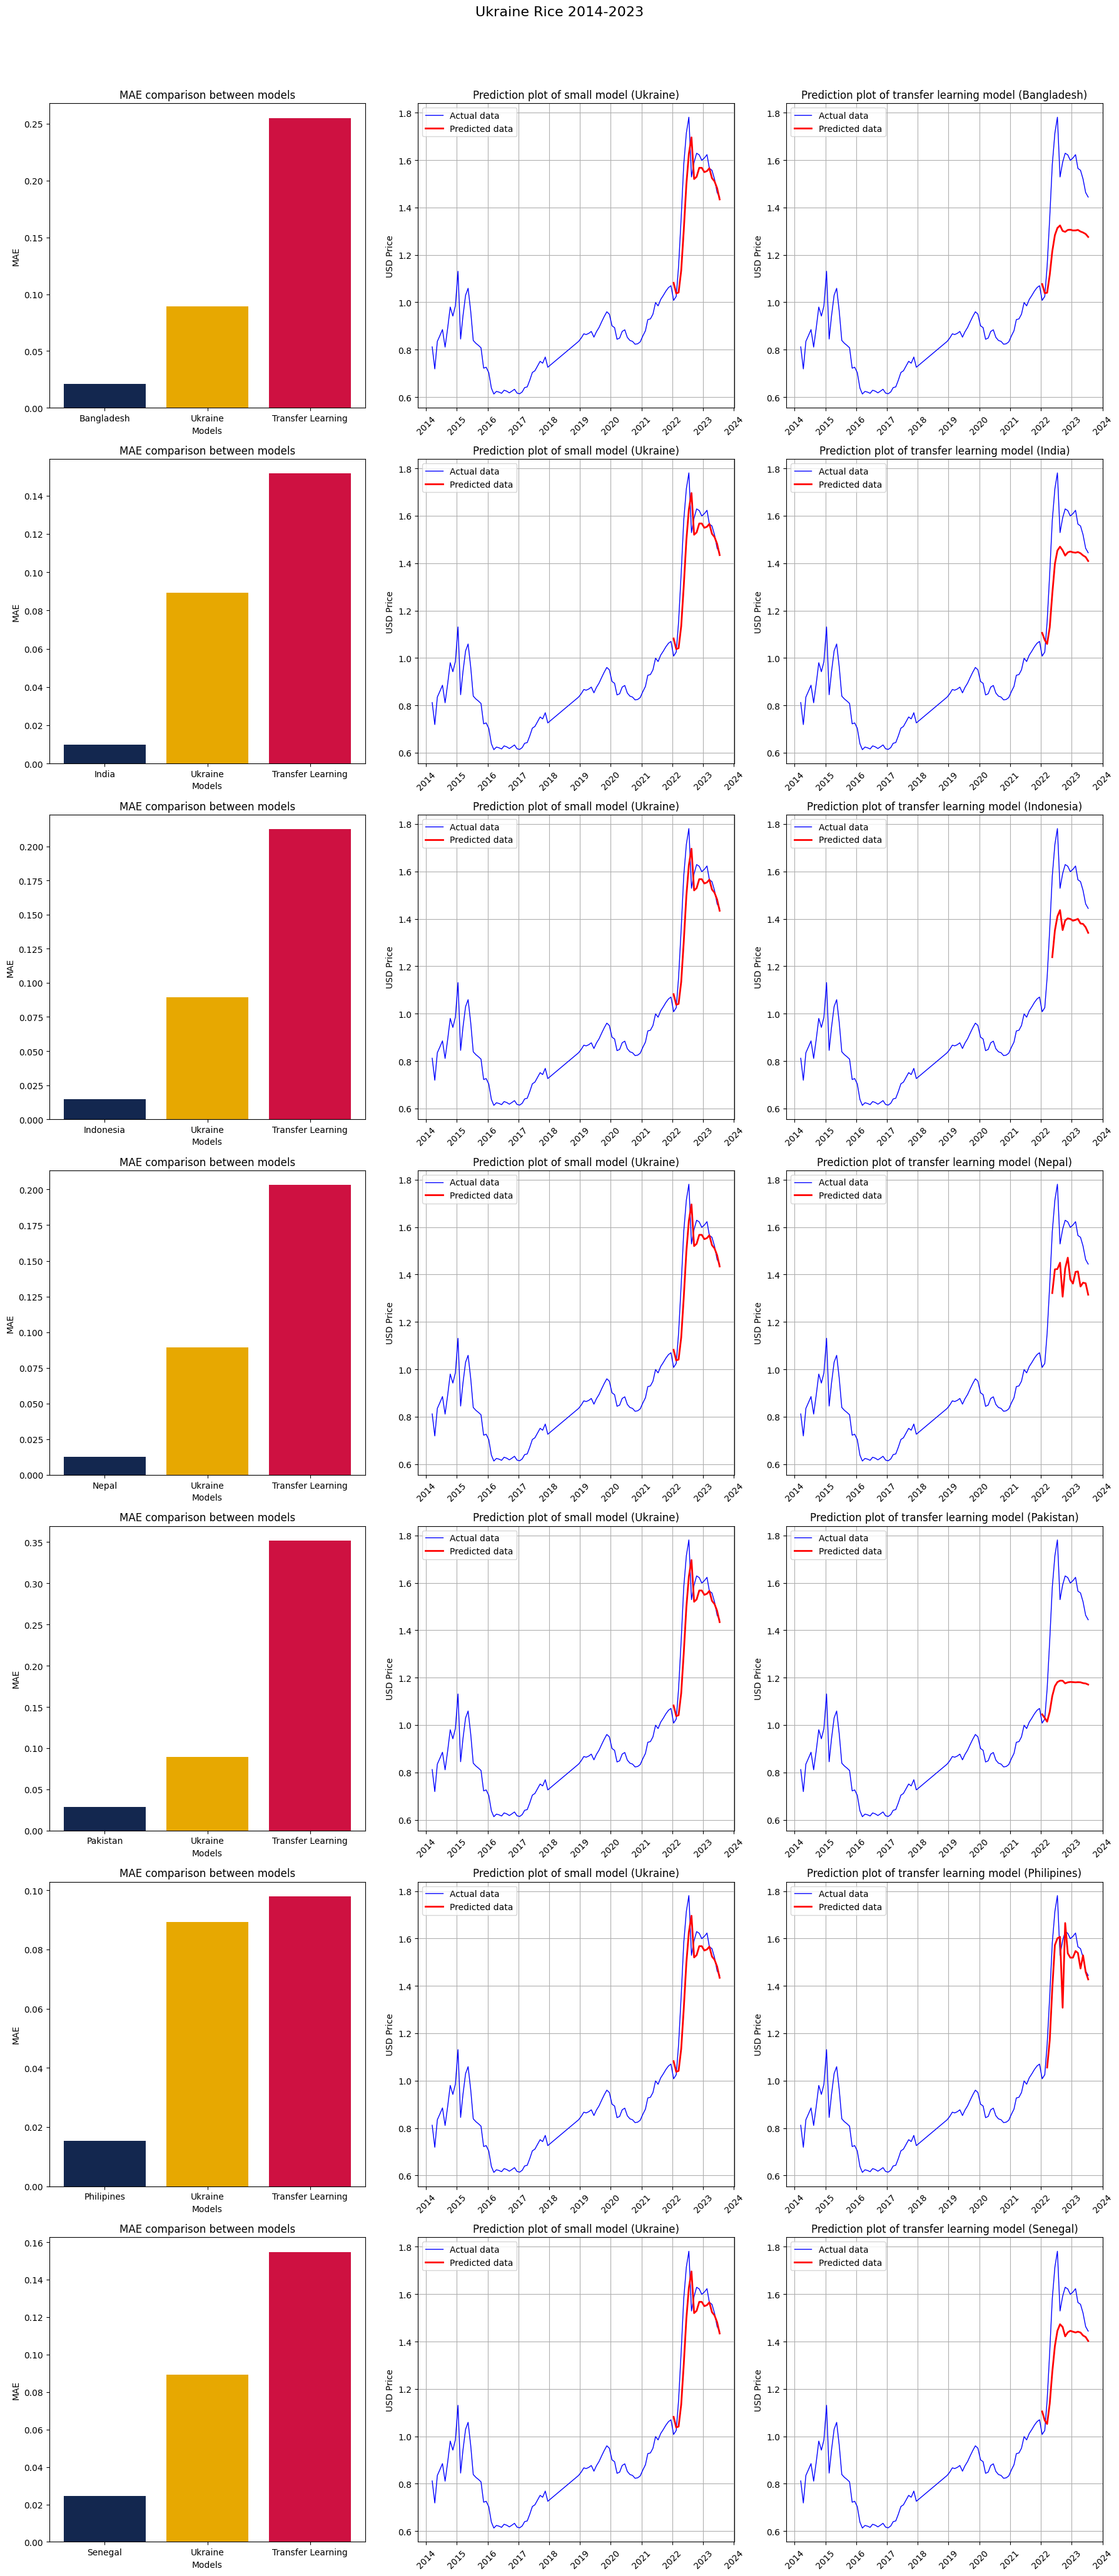

In [13]:
vis.visualize_tl_summary('Ukraine', large_datasets, commodity, 'Ukraine Rice 2014-2023')